# Teste t e f em grupos aleatórios

Lembrando:
H0: Grupos iguais estatisticamente.
Ha: Grupos diferentes estatisticamente.

In [23]:
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

In [13]:
dadost = pd.read_csv('~/Desktop/Jupyter Programs/Dados/dados_teste_t.csv', sep=',', encoding='utf-8')
dadosf = pd.read_csv('~/Desktop/Jupyter Programs/Dados/dados_teste_f.csv', sep=',', encoding='utf-8')

dadosf.head(5)

,grupo,absorbancia
0,A,10.536681
1,A,10.841177
2,A,11.624577
3,A,11.580703
4,A,7.933496


In [14]:
#Tratando os dados.
coluna_A = dadost[dadost['grupo'] == 'A']['concentracao'].reset_index(drop=True)
coluna_B = dadost[dadost['grupo'] == 'B']['concentracao'].reset_index(drop=True)

dft = pd.DataFrame({
    'concentracao A': coluna_A,
    'concentracao B': coluna_B
})

print(dft.head(5))

   concentracao A  concentracao B
0        5.496714        4.301555
1        4.861736        5.495226
2        5.647689        5.588743
3        6.523030        5.037267
4        4.765847        5.806457


In [22]:
#Valor de t e p para os dados.
t, p = ss.ttest_ind(dft['concentracao A'], dft['concentracao B'], equal_var=False)
print(f'Valor de t: {t}\nValor de p: {p}')

#Vendo em qual t está o valor de confiança: alfa = 0.05
t_c = ss.t.ppf(0.975, df = len(dft['concentracao A']) + len(dft['concentracao B']) - 2)
print(f'Valor de t crítico (em alfa = 0.05): {t_c}\n')

#Análise das médias e desvio padrão + variâncias
meanA = np.mean(dft['concentracao A'])
meanB = np.mean(dft['concentracao B'])
stdA = np.std(dft['concentracao A'])
stdB = np.std(dft['concentracao B'])
varA = np.var(dft['concentracao A'])
varB = np.var(dft['concentracao B'])

print(f'Concentração A: {meanA} +- {stdA}')
print(f'Concentração B: {meanB} +- {stdB}\n')
print(f'Variância de A: {varA}\nVariância de B: {varB}')

levene = ss.levene(dft['concentracao A'], dft['concentracao B'])

print(f'Levene: {levene.pvalue}')

Valor de t: -7.738786904885978
Valor de p: 5.94699499240671e-13
Valor de t crítico (em alfa = 0.05): 1.9720174778338955

Concentração A: 4.896153482605906 +- 0.9036161766446296
Concentração B: 6.026765504459908 +- 1.1386663686127751

Variância de A: 0.8165221946938584
Variância de B: 1.2965610990098044
Levene: 0.03993982535475074


Shapiro teste de A: 0.6551676754214818
Shapiro teste de B: 0.08525602813445946


(array([0.02694581, 0.16167485, 0.21556647, 0.37724132, 0.13472904,
        0.26945809, 0.37724132, 0.45807875, 0.3233497 , 0.08083743,
        0.08083743, 0.02694581, 0.08083743, 0.02694581, 0.05389162]),
 array([-2.32929096, -1.95817573, -1.5870605 , -1.21594527, -0.84483004,
        -0.47371481, -0.10259958,  0.26851565,  0.63963088,  1.01074611,
         1.38186134,  1.75297657,  2.1240918 ,  2.49520703,  2.86632226,
         3.2374375 ]),
 <BarContainer object of 15 artists>)

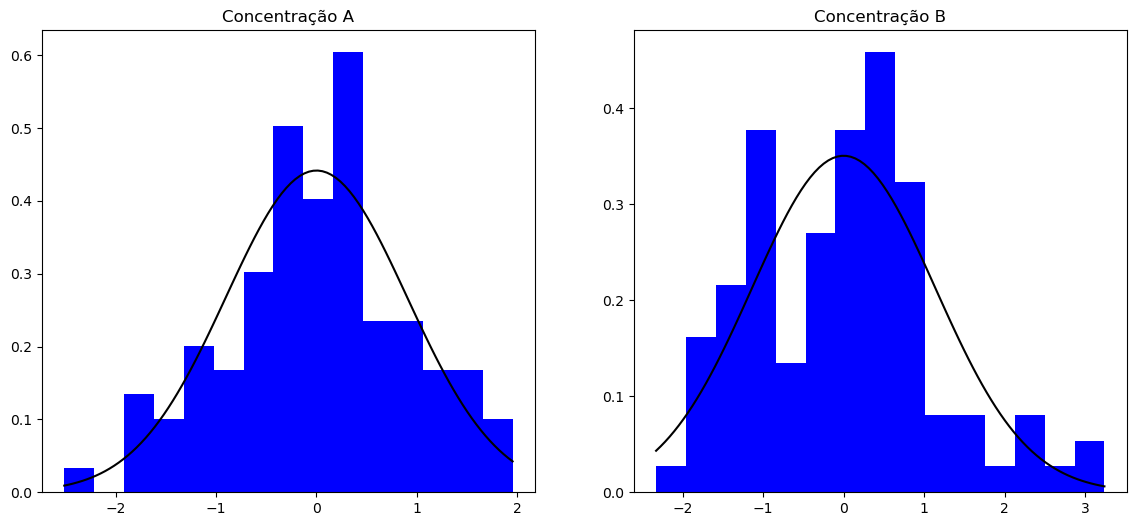

In [16]:
#Fazendo uma cruva de distribuição para A e B

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

residuoA = dft['concentracao A'] - meanA
A = np.linspace(min(residuoA), max(residuoA), len(dft['concentracao A']))
pdfA = ss.norm.pdf(A, loc = np.mean(residuoA), scale = np.std(residuoA))

shapiroA = ss.shapiro(residuoA)
print(f'Shapiro teste de A: {shapiroA.pvalue}')

residuoB = dft['concentracao B'] - meanB
B = np.linspace(min(residuoB), max(residuoB), len(dft['concentracao B']))
pdfB = ss.norm.pdf(B, loc = np.mean(residuoB), scale = np.std(residuoB))

shapiroB = ss.shapiro(residuoB)
print(f'Shapiro teste de B: {shapiroB.pvalue}')

ax1.set_title('Concentração A')
ax1.plot(A, pdfA, color = 'black')
ax1.hist(residuoA, bins = 15, color = 'blue', density=True)

ax2.set_title('Concentração B')
ax2.plot(B, pdfB, color = 'black')
ax2.hist(residuoB, bins = 15, color = 'blue', density=True)

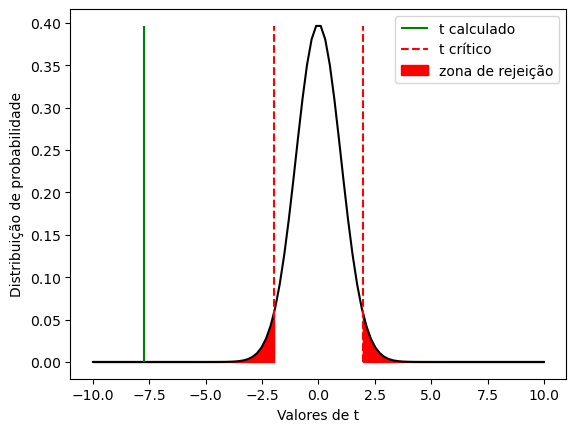

In [17]:
#Curva de probabilidade e modificações dela (Análise gráfica)
#Coloquei as linhas vermelhas para indicar o t_critico, valor exato de alfa = 0.05.

pdf = ss.t.pdf(np.linspace(-10, 10, 100), df = len(dft['concentracao A']) + len(dft['concentracao B']) - 2)

plt.plot(np.linspace(-10, 10, 100), pdf, color = 'black')
plt.ylabel('Distribuição de probabilidade')
plt.xlabel('Valores de t')

plt.vlines(x = t, ymin =0, ymax = max(pdf), color = 'green', label = 't calculado') #Onde meu t caiu.
plt.vlines(x = t_c, ymin = 0, ymax = max(pdf), color = 'red', linestyles='--') #Onde o t_crítico está.
plt.vlines(x = -t_c, ymin = 0, ymax = max(pdf), color = 'red', linestyles='--', label = 't crítico') #Onde o t_crítico está.

plt.fill_between(np.linspace(-10, -t_c, 100), ss.t.pdf(np.linspace(-10, -t_c, 100), df = len(dft['concentracao A']) + len(dft['concentracao B']) - 2), color = 'red')
plt.fill_between(np.linspace(t_c, 10, 100), ss.t.pdf(np.linspace(t_c, 10, 100), df = len(dft['concentracao A']) + len(dft['concentracao B']) - 2), color = 'red', label = 'zona de rejeição')

plt.legend()

# Conclusão e notas sobre o teste t

Com base no valor de p obtido e no gráfico análisado, podemos rejeitar a hipótese nula, de que os grupos são iguais estatisticamente.

Isso ocorre pois a curva de distribuição t é construído na premissa de que a hipótese nula é verdadeira. Por isso que o
máximo valor de t ocorre em 0. 

Entretanto, como obtivemos um valor de p muito pequeno (muito menor que 0.05), chegamos a conclusão de que a chance
de retirar aquele valor de t obtido é muito, mas muito baixa. Logo, não temos provas o suficiente para ficar com a hipótese nula, e rejeitamos ela. 

Algumas observações:
1) As variâncias não são iguais, o que significa que devemos usar Welch.
2) A distribuição dos resíduos é normal e pode ser verificada por shapiro. 

In [24]:
col_A = dadosf[dadosf['grupo'] == 'A']['absorbancia'].reset_index(drop = True)
col_B = dadosf[dadosf['grupo'] == 'B']['absorbancia'].reset_index(drop = True)
col_C = dadosf[dadosf['grupo'] == 'C']['absorbancia'].reset_index(drop = True)

dff = pd.DataFrame({
    'grupo A': col_A,
    'grupo B': col_B,
    'grupo C': col_C
})

print(dff.shape)

(80, 3)


In [19]:
#valor de f e de p para os dados
#nota-se que o valor de Levene é muito menor que 0.05. Isso indica que as variâncias são muito diferentes

levene = ss.levene(dff['grupo A'], dff['grupo B'], dff['grupo C'])
print(f'\nLevene p-valor: {levene.pvalue}')

f, p = ss.f_oneway(dff['grupo A'], dff['grupo B'], dff['grupo C'])
print(f'Valor de f: {f}')
print(f'Valor de p: {p}\n')

means = []
stds = []
grupos = []
variances = []

for grupo in dff:
    mean = np.mean(dff[grupo])
    std = np.std(dff[grupo])
    variancia = np.var(dff[grupo])
    
    means.append(mean)
    stds.append(std)
    grupos.append(grupo)
    variances.append(variancia)
    
conjunto = zip(means,stds,grupos,variances)

for i in conjunto:
    print(f'Valor médio {i[2]}: {i[0]} +- {i[1]}')
    print(f'Variância {i[2]}: {i[3]}')


Levene p-valor: 4.4900894560570304e-09
Valor de f: 228.0973719252897
Valor de p: 5.838893740257057e-56

Valor médio grupo A: 10.060326166292862 +- 1.669181626061737
Variância grupo A: 2.786167300782104
Valor médio grupo B: 12.069150666420024 +- 0.8026215307103004
Variância grupo B: 0.6442013215597457
Valor médio grupo C: 15.237899945969076 +- 1.9103704605818665
Variância grupo C: 3.6495152966637727


Teste Shapiro grupo A: 0.4116385180986255
Teste Shapiro grupo B: 0.932805019213676
Teste Shapiro grupo C: 0.4366509952330806


(array([0.04829575, 0.09659151, 0.07244363, 0.07244363, 0.19318302,
        0.16903514, 0.09659151, 0.28977453, 0.12073939, 0.24147877,
        0.09659151, 0.12073939, 0.14488726, 0.09659151, 0.07244363]),
 array([-4.06091225, -3.54326841, -3.02562457, -2.50798073, -1.99033689,
        -1.47269306, -0.95504922, -0.43740538,  0.08023846,  0.5978823 ,
         1.11552614,  1.63316998,  2.15081382,  2.66845766,  3.18610149,
         3.70374533]),
 <BarContainer object of 15 artists>)

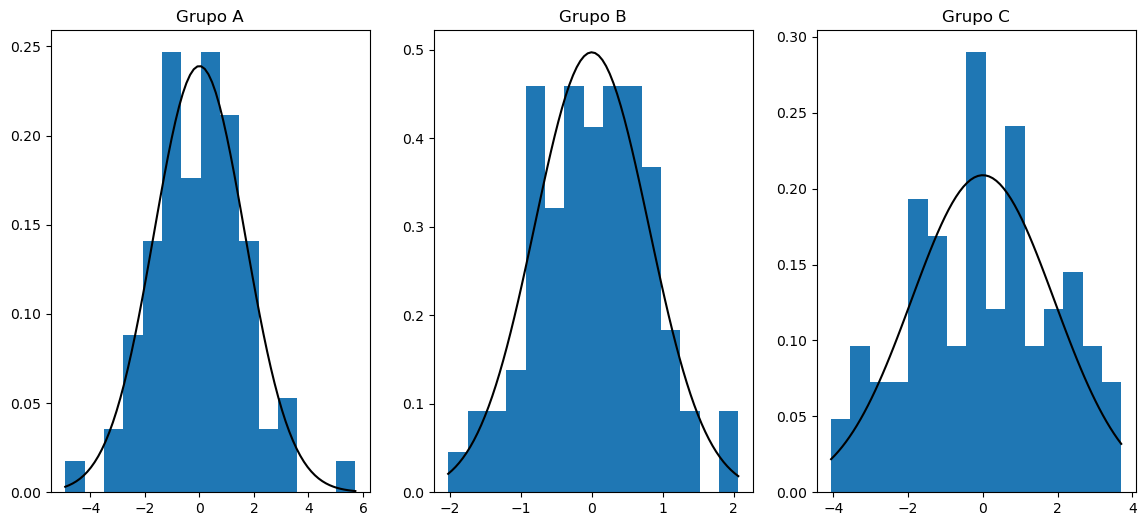

In [20]:
#Analisando normalidade dos resíduos

for grupo in dff:
    shapiro = ss.shapiro(dff[grupo])
    print(f'Teste Shapiro {grupo}: {shapiro.pvalue}')

residuoAf = dff['grupo A'] - means[0]
residuoBf = dff['grupo B'] - means[1]
residuoCf = dff['grupo C'] - means[2]

A = np.linspace(min(residuoAf), max(residuoAf), len(residuoAf))
B = np.linspace(min(residuoBf), max(residuoBf), len(residuoBf))
C = np.linspace(min(residuoCf), max(residuoCf), len(residuoCf))

pdfA = ss.norm.pdf(A, loc=np.mean(residuoAf), scale=np.std(residuoAf))
pdfB = ss.norm.pdf(B, loc=np.mean(residuoBf), scale=np.std(residuoBf))
pdfC = ss.norm.pdf(C, loc=np.mean(residuoCf), scale=np.std(residuoCf))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (14, 6))

ax1.set_title('Grupo A')
ax1.plot(A, pdfA, color = 'black')
ax1.hist(residuoAf, bins = 15, density=True)

ax2.set_title('Grupo B')
ax2.plot(B, pdfB, color = 'black')
ax2.hist(residuoBf, bins = 15, density=True)

ax3.set_title('Grupo C')
ax3.plot(C, pdfC, color = 'black')
ax3.hist(residuoCf, bins = 15, density=True)

Text(0, 0.5, 'Distribuição de probabilidade')

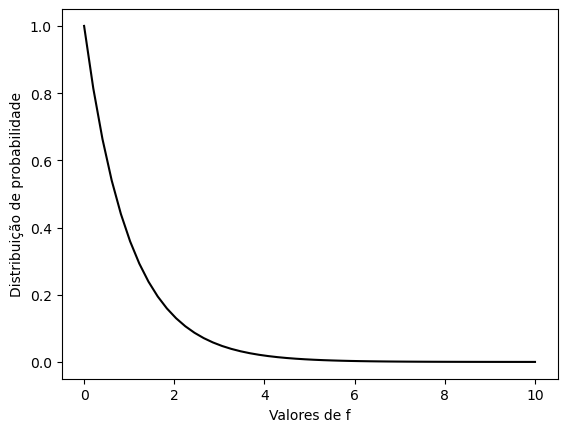

In [21]:
#DFN = degress of freedom of numerator
#DFD = degress of freedom of denominator

f = np.linspace(0, 10)
dfd = len(col_A) + len(col_B) + len(col_C) - 3
dfn = 2

pdf = ss.f.pdf(f, dfn, dfd)

plt.plot(f, pdf, color = 'black')
plt.xlabel('Valores de f')
plt.ylabel('Distribuição de probabilidade')

# Conclusão e notas sobre o teste f

As etapas são:
1) Calcular a média das médias do grupo. 
2) Medir a distância ao quadrada da média de cada grupo com a média das médias do grupo.
3) Múltiplicar essa distância ao quadrada pelo número de amostras dentro do grupo.
4) Divide pelos graus de liberdade (número de grupos - 1): Cria o quadrado médio entre os grupos (QMentre)

5) Somar todas as distâncias ao quadrado entre uma amostra de dentro do grupo A com a média do grupo A. (Aamostra - Amedia)². Faz essa soma para todos os valores dentro de A.
6) Divide o que obter por N - k. Isso cria o quadrado métro dentro dos grupos (QMdentro)

7) F = QMentre/QMdentro: Ou seja, se QMentre for maior que QMdentro, significa que a variância entre os grupos é maior que a variância dentro dos grupos. Isso significa dizer que dentro de cada grupos as variações acontecem, mas são pequenas, como se as medições fossem precisas. Agora entre os grupos, essa variação é alta, então provavelmente será diferente os grupos.

Um ponto: O teste-f aqui não deve ser feito, pois as variâncias são muito diferentes. Então abaixo, farei um teste de Welch e em seguida um teste post-hoc para encontrar qual é o conjunto diferente. 

O teste de post-hoc a ser realizado sera o de Games-Howell, pois parte de que as variâncias são diferentes.

In [28]:
dff_longo = dff.melt(value_vars=['grupo A', 'grupo B', 'grupo C'], var_name='grupos', value_name='absorbancia')
print(dff_longo.head(5))

    grupos  absorbancia
0  grupo A    10.536681
1  grupo A    10.841177
2  grupo A    11.624577
3  grupo A    11.580703
4  grupo A     7.933496


In [30]:
pg.welch_anova(data=dff_longo, dv='absorbancia', between='grupos') #teste F welch. 

,Source,ddof1,ddof2,F,p-unc,np2
0,grupos,2,136.149811,164.688833,4.496587e-37,0.658105


In [32]:
pg.pairwise_gameshowell(data=dff_longo, between='grupos', dv='absorbancia') #teste games-howeel. ver o pval. todas são diferentes

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,grupo A,grupo B,10.060326,12.069151,-2.008825,0.208380,-9.640180,113.677954,0.0,-1.516999
1,grupo A,grupo C,10.060326,15.237900,-5.177574,0.285420,-18.140219,155.206855,0.0,-2.854584
2,grupo B,grupo C,12.069151,15.237900,-3.168749,0.233133,-13.592043,106.046944,0.0,-2.138873
